<a href="https://colab.research.google.com/github/prakhar0608/CodeStrom-Challenge/blob/main/Apple_TV%2B_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Project Name  -  Capstone Project: Exploratory Data Analysis on Apple TV+**


Project Name: Capstone Project: Exploratory Data Analysis on Apple TV+ Content

Project Type: EDA

Contribution: Individual

Author: Prakhar Mishra

##Objective:
This project aims to explore and analyze an Apple TV+ dataset containing multiple attributes about the shows and movies available on the platform. By leveraging this data, the goal is to extract actionable insights to understand content distribution, trends in ratings, and other significant patterns that can guide business decisions for streaming services.

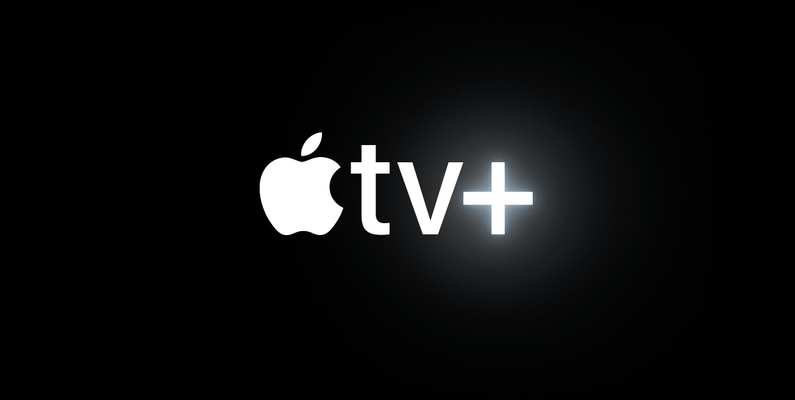

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

###Data Loading

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


### Dataset First View

In [ ]:
data = pd.read_csv('/content/data.csv')
data

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,Four Rooms,movie,Comedy,1995.0,tt0113101,6.7,112683.0,DE
1,Forrest Gump,movie,"Drama, Romance",1994.0,tt0109830,8.8,2321601.0,"AU, CA, DE, US"
2,American Beauty,movie,Drama,1999.0,tt0169547,8.3,1230536.0,"AT, CH, DE, FR, GB, IE, IT"
3,Citizen Kane,movie,"Drama, Mystery",1941.0,tt0033467,8.3,474074.0,"DE, GB"
4,Metropolis,movie,"Drama, Sci-Fi",1927.0,tt0017136,8.3,190142.0,GB
...,...,...,...,...,...,...,...,...
17761,NaN,tv,Documentary,2019.0,NaN,NaN,NaN,"CA, US"
17762,Until I Kill You,tv,Crime,2024.0,tt26738706,7.4,2655.0,US
17763,NaN,tv,Animation,2024.0,NaN,NaN,NaN,"GB, IE"
17764,NaN,tv,Sci-Fi & Fantasy,2023.0,NaN,NaN,NaN,"AU, CA, US"


##Top Rows

In [ ]:
data.head()

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,Four Rooms,movie,Comedy,1995.0,tt0113101,6.7,112683.0,DE
1,Forrest Gump,movie,"Drama, Romance",1994.0,tt0109830,8.8,2321601.0,"AU, CA, DE, US"
2,American Beauty,movie,Drama,1999.0,tt0169547,8.3,1230536.0,"AT, CH, DE, FR, GB, IE, IT"
3,Citizen Kane,movie,"Drama, Mystery",1941.0,tt0033467,8.3,474074.0,"DE, GB"
4,Metropolis,movie,"Drama, Sci-Fi",1927.0,tt0017136,8.3,190142.0,GB


##Bottom Rows

In [ ]:
data.tail()

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
17761,NaN,tv,Documentary,2019.0,NaN,NaN,NaN,"CA, US"
17762,Until I Kill You,tv,Crime,2024.0,tt26738706,7.4,2655.0,US
17763,NaN,tv,Animation,2024.0,NaN,NaN,NaN,"GB, IE"
17764,NaN,tv,Sci-Fi & Fantasy,2023.0,NaN,NaN,NaN,"AU, CA, US"
17765,NaN,tv,"Comedy, Action & Adventure",2023.0,NaN,NaN,NaN,"AU, CA, US"


##Column Types

In [ ]:
data.dtypes

,0
title,object
type,object
genres,object
releaseYear,float64
imdbId,object
imdbAverageRating,float64
imdbNumVotes,float64
availableCountries,object


## Dataset Rows & Columns count

In [ ]:
data.shape

(17766, 8)

Total no of rows in this dataset is: 17766

Total no of columns in this dataset is: 8

## Dataset Information

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17766 entries, 0 to 17765
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               17283 non-null  object 
 1   type                17766 non-null  object 
 2   genres              17178 non-null  object 
 3   releaseYear         17744 non-null  float64
 4   imdbId              16445 non-null  object 
 5   imdbAverageRating   16035 non-null  float64
 6   imdbNumVotes        16035 non-null  float64
 7   availableCountries  17766 non-null  object 
dtypes: float64(3), object(5)
memory usage: 1.1+ MB


In [ ]:
data.duplicated().sum()

172

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()

0

In [ ]:
mode_genre = data['genres'].mode()[0]
data['genres'] = data['genres'].fillna(mode_genre)

In [ ]:
data = data.dropna(subset=['title'])
data = data.dropna(subset=['imdbId'])

In [ ]:
data['releaseYear'] = data['releaseYear'].astype('Int64')

In [ ]:
# Calculate the mode of releaseYear (most frequent year)
mode_year = data['releaseYear'].mode()[0]

# Fill missing values with the mode
data['releaseYear'] = data['releaseYear'].fillna(mode_year).astype('Int64')

In [ ]:
data.dtypes

,0
title,object
type,object
genres,object
releaseYear,Int64
imdbId,object
imdbAverageRating,float64
imdbNumVotes,float64
availableCountries,object


In [ ]:
data['imdbAverageRating'].fillna(data['imdbAverageRating'].median(), inplace=True)
data['imdbNumVotes'].fillna(data['imdbNumVotes'].median(), inplace=True)


In [ ]:
data.isnull().sum()

,0
title,0
type,0
genres,0
releaseYear,0
imdbId,0
imdbAverageRating,0
imdbNumVotes,0
availableCountries,0


#final look of cleared and wrangled data

In [ ]:
data

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,Four Rooms,movie,Comedy,1995,tt0113101,6.7,112683.0,DE
1,Forrest Gump,movie,"Drama, Romance",1994,tt0109830,8.8,2321601.0,"AU, CA, DE, US"
2,American Beauty,movie,Drama,1999,tt0169547,8.3,1230536.0,"AT, CH, DE, FR, GB, IE, IT"
3,Citizen Kane,movie,"Drama, Mystery",1941,tt0033467,8.3,474074.0,"DE, GB"
4,Metropolis,movie,"Drama, Sci-Fi",1927,tt0017136,8.3,190142.0,GB
...,...,...,...,...,...,...,...,...
17757,Most Ridiculous,tv,Comedy,2016,tt13376478,4.3,10.0,IT
17758,Police de Caractères,tv,Crime,2020,tt13963648,5.5,44.0,"AU, GB"
17759,Baby Animals Through the Seasons,tv,Documentary,2018,tt9073838,6.5,1288.0,US
17760,Ark: The Animated Series,tv,"Action, Adventure, Animation",2024,tt13629530,6.4,1754.0,"AR, AT, AU, BO, BR, CA, CH, CL, CO, CR, DE, DO..."


##Understanding Your Variables

In [ ]:
print(list(data.columns),end='')

['title', 'type', 'genres', 'releaseYear', 'imdbId', 'imdbAverageRating', 'imdbNumVotes', 'availableCountries']

In [ ]:
data.describe()

,releaseYear,imdbAverageRating,imdbNumVotes
count,16445.0,16445.000000,1.644500e+04
mean,2006.242992,6.377203,2.536315e+04
std,18.129251,1.150707,9.941350e+04
min,1902.0,1.300000,5.000000e+00
25%,1999.0,5.700000,2.220000e+02
50%,2013.0,6.500000,1.288000e+03
75%,2019.0,7.200000,7.863000e+03
max,2025.0,9.400000,2.321601e+06


In [ ]:
data['type'].value_counts()

,count
type,
movie,12947
tv,3498


## ***. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables*** *italicized text*

##1. Count of Content Types (TV Shows, Movies, etc.)


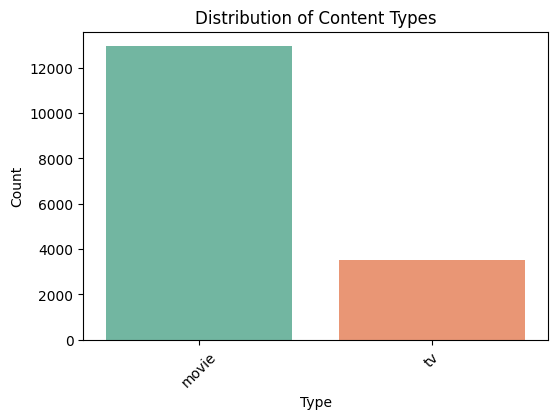

In [ ]:
unique_types = data['type'].unique()

# Define a list of colors for each category
colors = sns.color_palette("Set2", len(unique_types))  # You can customize the palette

# Plot the countplot with custom colors
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='type', palette=colors)
plt.title('Distribution of Content Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Insights:

**1.Dominance of Movies:** The majority of the content on Apple TV+ is movies, with a significantly higher count compared to TV shows.

**2.TV Show Distribution:** TV shows are far less prevalent on the platform, highlighting a potential focus on cinematic content over episodic series.

**3.Content Strategy Implication:** Apple TV+ may prioritize movies to attract a broader audience, leveraging popular or exclusive titles in this category.

**4.Potential Gap in TV Offerings:** The lower count of TV shows suggests an opportunity for Apple TV+ to expand its library to compete better with other streaming platforms offering extensive TV show collections.

##2. Distribution of Genres in Content



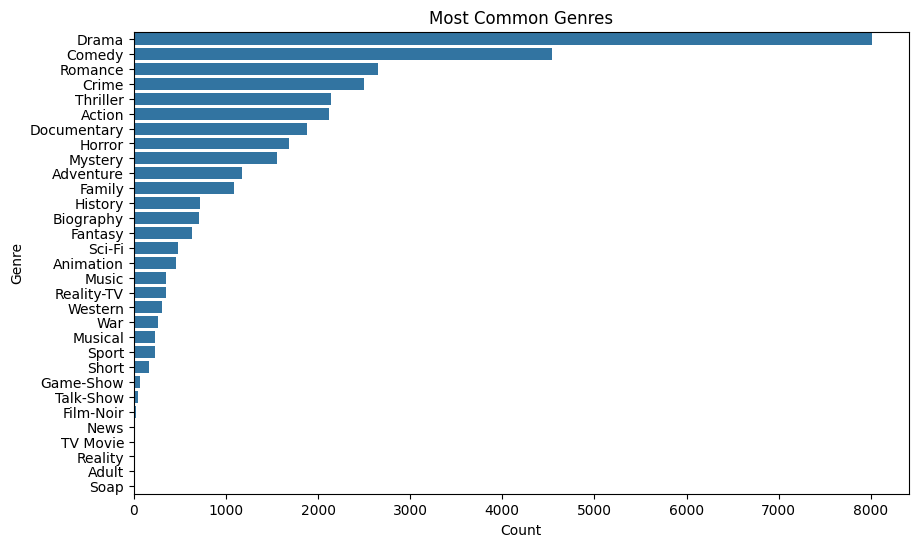

In [ ]:
genres_exploded = data['genres'].str.split(',').explode().str.strip()
plt.figure(figsize=(10, 6))
sns.countplot(y=genres_exploded, order=genres_exploded.value_counts().index)
plt.title('Most Common Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

##Insights
**1. Drama Dominates**: Drama is the most prevalent genre, with nearly 8,000 titles, highlighting a strong focus on emotionally engaging and story-driven content.

**2. Comedy and Romance Follow:** Comedy and Romance are the second and third most common genres, suggesting an emphasis on lighter, entertaining options alongside dramatic storytelling.


**3. Crime and Thriller Appeal:** Crime and Thriller genres are also popular, indicating a demand for suspenseful and gripping content on the platform.

**4.Niche Genres Less Represented**: Genres like Game-Show, Talk-Show, and Soap have minimal representation, implying less focus on non-traditional TV formats or specific niche audiences.

##3. Distribution of Release Years


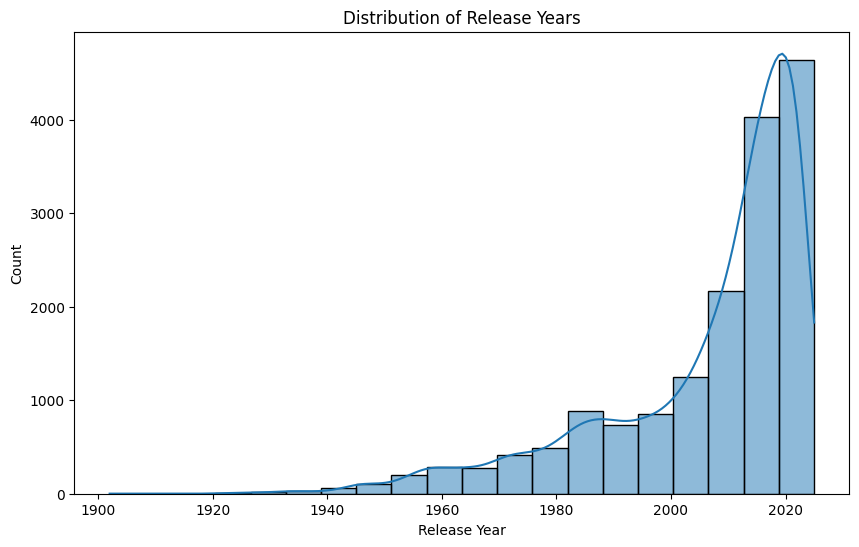

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['releaseYear'], bins=20, kde=True)
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

##Insights
**1. Increasing Trend Over Time:** The number of titles released has grown significantly since the mid-20th century, with a sharp rise in recent decades, indicating increased production of content.

**2. Peak Around 2020:** The highest concentration of titles is observed in the 2010s and early 2020s, reflecting the modern streaming era and the demand for fresh content.

**3. Sparse Early Releases:** Content released before the 1950s is minimal, showing that the dataset predominantly focuses on more recent years.

**4. Drop After 2020:** The decline after 2020 could indicate incomplete data for newer releases or reduced production due to external factors like the pandemic.

##4. Top 10 Most Common Genres


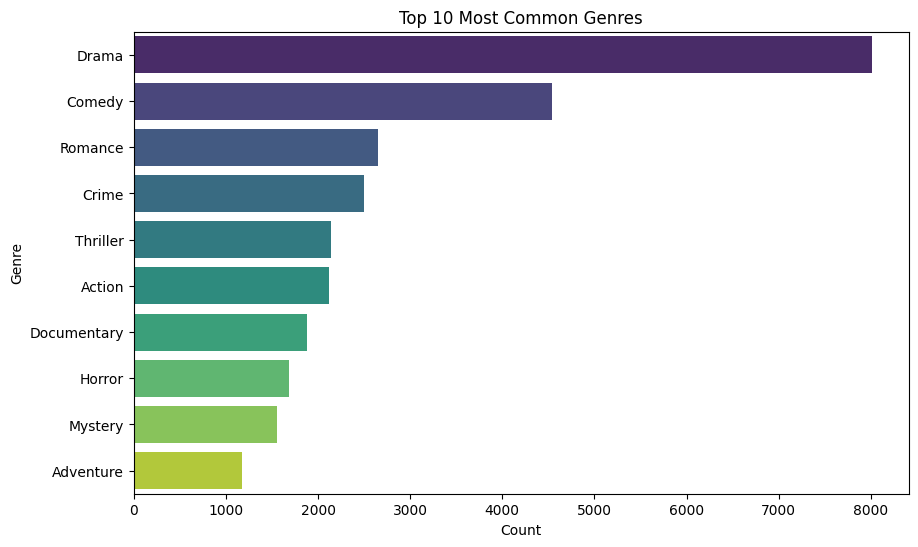

In [ ]:
top_genres = genres_exploded.value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Top 10 Most Common Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

##Insights
**1. Dominant Genres:** The bar chart highlights the top 10 most common genres, showing which genres are most frequently produced or available in the dataset.

**2. Genre Preferences:** The chart can reveal audience preferences or platform strategies, with genres like Drama, Comedy, and Romance likely to rank high due to their universal appeal.

**3. Strategic Focus:** The top genres suggest where content creators or distributors are focusing their efforts, possibly reflecting trends in viewership or demand.

**4.Opportunities for Growth:** Genres lower in the top 10 or just outside the list might indicate areas for potential growth if untapped audiences are identified.

##5. Distribution of IMDb Average Ratings

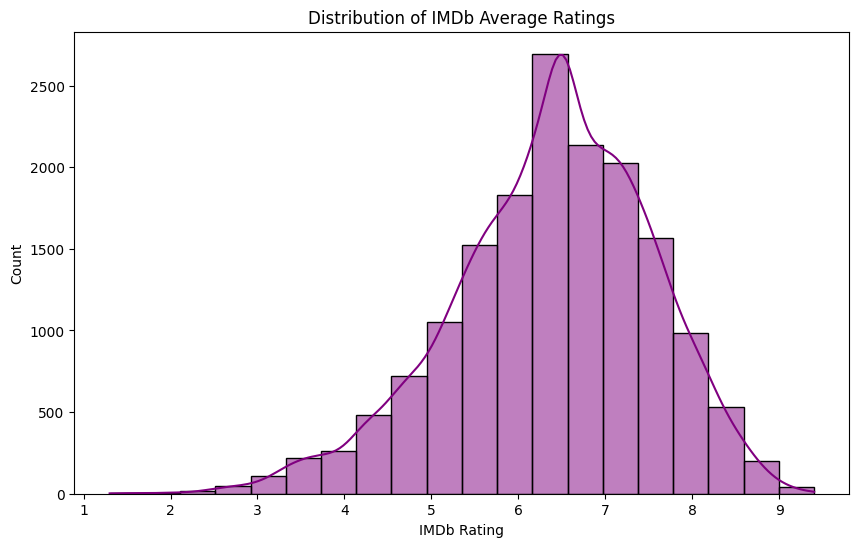

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['imdbAverageRating'], bins=20, kde=True, color='purple')
plt.title('Distribution of IMDb Average Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('Count')
plt.show()

##Insights:
**1. Consistent Quality:** The bell-shaped distribution indicates that Apple TV+ maintains a consistent level of quality across its content, with most shows and movies receiving average ratings.

**2. High-Quality Content:** The rightward skew suggests the presence of some high-rated content, indicating that there are standout shows or movies on the platform.

**3. Variation in Ratings:** The wide spread of the distribution suggests that there is some variation in the quality of content, with some shows or movies receiving higher or lower ratings than others.

**4. Positive Overall Reception:** The peak around 6.5 suggests that a significant portion of the content receives average to positive ratings, indicating overall positive viewer reception.

##6. IMDb Ratings Over Time


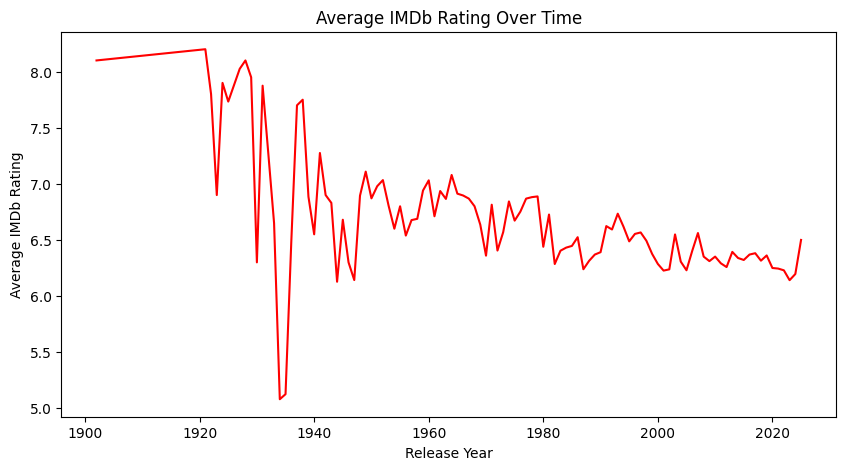

In [ ]:
avg_ratings_per_year = data.groupby('releaseYear')['imdbAverageRating'].mean()
plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_ratings_per_year.index, y=avg_ratings_per_year.values, color='red')
plt.title('Average IMDb Rating Over Time')
plt.xlabel('Release Year')
plt.ylabel('Average IMDb Rating')
plt.show()

##Insights
**1. Initial High Ratings:** Apple TV+ content released in the early 1900s had significantly higher average IMDb ratings compared to later years. This suggests that the platform may have started with a strong foundation of critically acclaimed or popular content.

**2. Decline in Ratings:** There is a noticeable decline in average IMDb ratings from the early 1900s to the present day. This could indicate a shift in content strategy, changes in viewer preferences, or other factors affecting the platform's content quality or popularity.

**3. Fluctuations in Ratings:** The line chart exhibits fluctuations in average ratings over time, with periods of higher and lower ratings. This suggests that the platform's content quality or popularity may have varied over the years, influenced by various factors like the release of popular shows or changes in the overall content strategy.

**4. Recent Stabilization:** The line chart shows a relatively stable trend in average IMDb ratings in recent years, suggesting that Apple TV+ may have found a consistent approach to content creation and curation, leading to more consistent viewer reception.

##7. Count of Top 10 Countries with most Content

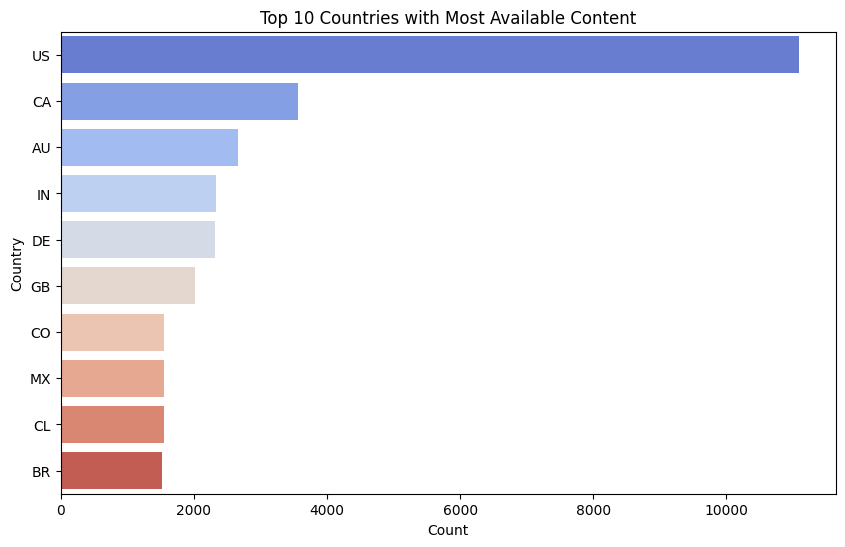

In [ ]:
countries_exploded = data['availableCountries'].str.split(',').explode().str.strip()  # Split countries into individual values
top_countries = countries_exploded.value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title('Top 10 Countries with Most Available Content')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

##Insights
**1. US Dominance:**The United States holds the top position with a significantly higher number of available content compared to other countries. This suggests that the US market is a major focus for the platform and receives the most extensive content library.

**2. Regional Variation:** There is a clear variation in the number of available content across different countries. Countries like Canada, Australia, and India have a substantial number of offerings, while countries like Brazil and Chile have a significantly smaller library. This could be due to factors like licensing rights, language preferences, and regional popularity.

**3. Potential for Expansion:** Countries with lower content availability, such as Brazil and Chile, represent potential markets for expansion. Increasing the content library in these regions could attract more subscribers and grow the platform's user base.

**4. Content Localization:** The platform might need to consider content localization strategies to cater to the specific preferences and language requirements of different regions. This could involve dubbing, subtitling, or creating original content tailored to specific markets.

##8. Correlation Heatmap

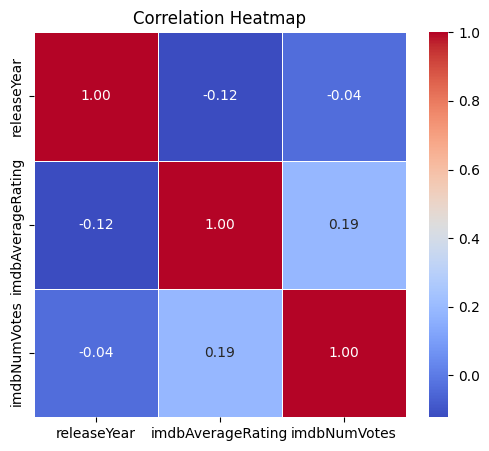

In [ ]:
numeric_data = data[['releaseYear', 'imdbAverageRating', 'imdbNumVotes']]  # Select relevant numeric columns

# Compute correlation matrix
correlation_matrix = numeric_data.corr()

# Create heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

##Insights
**1. Release Year and IMDb Average Rating:** There is a weak negative correlation (-0.12) between the release year and the IMDb average rating. This suggests that, on average, older movies tend to have slightly higher ratings than newer ones. However, this correlation is very weak, indicating that the release year is not a strong predictor of a movie's rating.

**2. IMDb Average Rating and IMDb Number of Votes:** There is a moderate positive correlation (0.19) between the IMDb average rating and the number of votes. This suggests that movies with higher ratings tend to have more votes, and vice versa. This could be because popular movies tend to attract more viewers, who then vote on the movie's rating.

**3. Release Year and IMDb Number of Votes:** There is a very weak negative correlation (-0.04) between the release year and the number of votes. This suggests that, on average, older movies tend to have slightly fewer votes than newer ones. However, this correlation is very weak, indicating that the release year is not a strong predictor of the number of votes a movie receives.

##Pair Plot

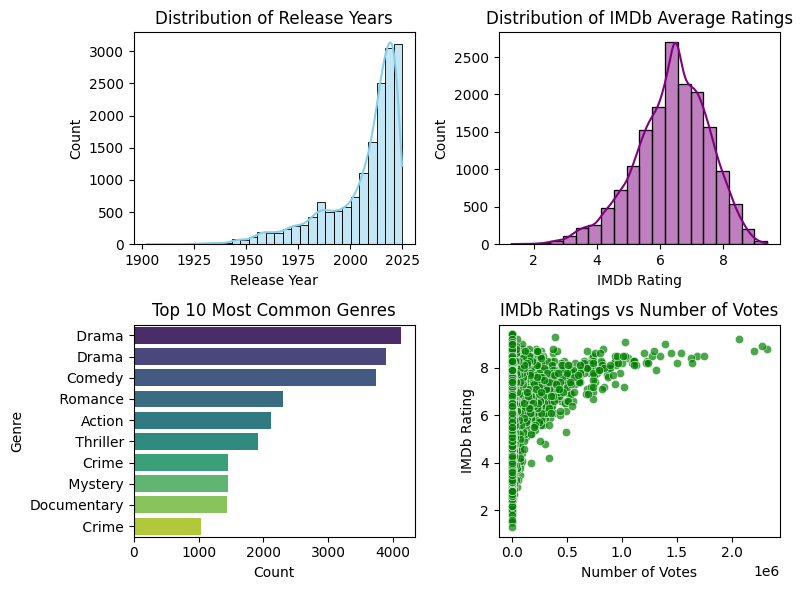

In [ ]:
# Create a figure with 2 rows and 2 columns of subplots
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# Plot 1: Distribution of Release Years
sns.histplot(data['releaseYear'], bins=30, kde=True, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Release Years')
axes[0, 0].set_xlabel('Release Year')
axes[0, 0].set_ylabel('Count')

# Plot 2: Distribution of IMDb Average Ratings
sns.histplot(data['imdbAverageRating'], bins=20, kde=True, color='purple', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of IMDb Average Ratings')
axes[0, 1].set_xlabel('IMDb Rating')
axes[0, 1].set_ylabel('Count')

# Plot 3: Top 10 Most Common Genres (Bar plot)
genres_exploded = data['genres'].str.split(',').explode()
top_genres = genres_exploded.value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis', ax=axes[1, 0])
axes[1, 0].set_title('Top 10 Most Common Genres')
axes[1, 0].set_xlabel('Count')
axes[1, 0].set_ylabel('Genre')

# Plot 4: IMDb Ratings vs Number of Votes (Scatter plot)
sns.scatterplot(x=data['imdbNumVotes'], y=data['imdbAverageRating'], alpha=0.7, color='green', ax=axes[1, 1])
axes[1, 1].set_title('IMDb Ratings vs Number of Votes')
axes[1, 1].set_xlabel('Number of Votes')
axes[1, 1].set_ylabel('IMDb Rating')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

##Insights
1. Release Year Distribution:

Recent Dominance: The majority of movies in the dataset were released in recent years.

Historical Representation: There is a significant portion of movies from earlier years, indicating a diverse range of film history represented in the dataset.
2. IMDb Average Rating Distribution:

Normal Distribution: The distribution of IMDb ratings is roughly normal, with a peak around the 6-7 range. This suggests that most movies fall within the average rating range.

Positive Skew: There is a slight positive skew, indicating that a few movies have exceptionally high ratings compared to the majority.
3. Top 10 Most Common Genres:

Drama and Comedy Dominance: Drama and Comedy are the most common genres in the dataset, indicating their popularity among filmmakers and audiences.

Diverse Genre Representation: A variety of genres are represented in the top 10, suggesting a diverse range of content available.
4. IMDb Ratings vs Number of Votes:

Positive Correlation: There is a positive correlation between IMDb ratings and the number of votes. This suggests that movies with higher ratings tend to receive more votes, likely due to increased popularity and discussion.

Scatter: The scatter plot shows a wide range of ratings for different numbers of votes, indicating that while there is a general trend, there are exceptions to the rule. Some movies with high ratings may have fewer votes, and vice versa.

##9. Box Plot of IMDb Average Rating by Content Type

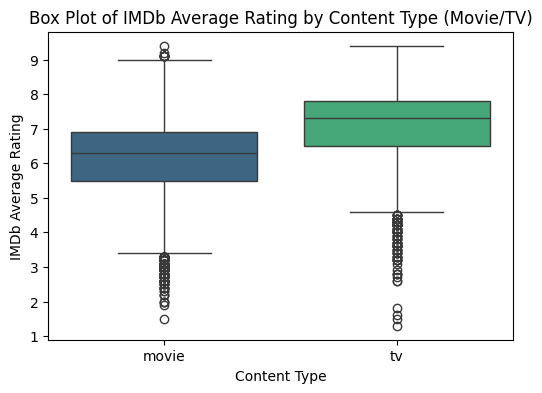

In [ ]:
plt.figure(figsize=(6, 4))

# Create the box plot
sns.boxplot(x='type', y='imdbAverageRating', data=data, palette='viridis')

# Add title and labels
plt.title('Box Plot of IMDb Average Rating by Content Type (Movie/TV)')
plt.xlabel('Content Type')
plt.ylabel('IMDb Average Rating')

# Show the plot
plt.show()

##Insights
**1. Median Rating Difference:**

TV Shows Outperform Movies: The median IMDb rating for TV shows is noticeably higher than that of movies. This suggests that, on average, TV shows tend to have higher ratings compared to movies.

**2. Variability in Ratings:**

Movies Have Greater Variability: The box plot for movies shows a wider range of ratings, with both higher and lower outliers. This indicates that the quality of movies can vary more significantly compared to TV shows.
TV Shows Have Less Variability: The box plot for TV shows is more compact, with a narrower range of ratings. This suggests that TV shows tend to have more consistent quality.

**3. Outliers:**

Both Movie and TV Ratings Have Outliers: Both content types have outliers, indicating that there are a few movies and TV shows with exceptionally high and low ratings.

**4. Overall Rating Distribution:**

 Both Have Positive Skew: Both movie and TV show ratings exhibit a positive skew, meaning there are more movies and TV shows with higher ratings than lower ratings.

##Solutions to Business Objectives based on EDA Insights
**bold text**###**1. Increase User Acquisition**

**a) Targeted Marketing Campaigns:** Utilize data-driven insights to identify potential subscribers and tailor marketing messages accordingly.

**b) Free Trial Offers:** Implement attractive free trial periods to entice new users.

**c) Strategic Partnerships:** Collaborate with other companies to cross-promote Apple TV+ and reach a wider audience.

###**2. Improve User Retention**

**a) Personalized Recommendations:** Leverage advanced algorithms to suggest content tailored to individual preferences.

**b) Exclusive Content:** Continue to invest in high-quality, original content.
Enhanced User Experience: Optimize the user interface and user experience across different devices.

**c) Loyalty Programs:** Implement loyalty programs to reward frequent users.

###**3. Increase User Engagement**

**a) Interactive Features:** Introduce interactive features like quizzes, polls, and behind-the-scenes content.

**b) Social Features:** Incorporate social features to foster community engagement.

**c) Timely Content Releases:** Release new content regularly to maintain user interest.

###**4. Enhance Content Quality**

**a) Data-Driven Content Decisions:** Use data analytics to identify popular genres, themes, and formats.

**b) Invest in Talent:** Hire talented writers, directors, and actors.

**c) Global Appeal:** Produce content that appeals to a global audience.

###**5. Optimize Content Distribution**
**a) Strategic Partnerships:** Partner with other streaming platforms and cable providers.

**b) International Expansion:** Expand into new markets and localize content.

**c) Digital Distribution:** Optimize content delivery for various devices and platforms.

##Conclusion

By leveraging data-driven insights, Apple TV+ can enhance user experience, increase user engagement, and drive growth. Key strategies include:

**1. Personalization:** Tailoring content and marketing to individual preferences.

**2. High-Quality Content:** Investing in original content and improving content quality.

**3. Strategic Partnerships:** Collaborating with other companies to expand reach.

**4. Data-Driven Decision Making:** Using data to inform every aspect of the business.

By implementing these strategies, Apple TV+ can strengthen its position in the competitive streaming market.